In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, LSTM, GaussianNoise
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

/var/folders/_x/1j3rm6sd6cn3kd7qpmy3s_k40000gn/T/ipykernel_990/3858744829.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('trainset.csv')
dt=pd.read_csv('testset.csv')

In [3]:
df.isnull().sum()
df.fillna(0,inplace=True)
dt.isnull().sum()
dt.fillna(0,inplace=True)
X = df.loc[:,df.columns[1:]].values
Y = df.loc[:,df.columns[0]].values
A = dt.loc[:,dt.columns[1:]].values
B = dt.loc[:,dt.columns[0]].values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_val_scaled = scaler.transform(A)

In [14]:
Y

array([1, 1, 1, ..., 0, 0, 0])

## ANN MODEL

In [5]:
#ANN model 
model = Sequential() 

model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],))) 
model.add(GaussianNoise(0.1))
model.add(Dropout(0.3)) 

model.add(BatchNormalization())

model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.3)) 

model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.3)) 

model.add(Dense(32, activation='relu')) 
model.add(Dropout(0.3)) 

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [6]:
history= model.fit(X_train_scaled, Y, batch_size=64, epochs=20, validation_data=(X_val_scaled, B))

Epoch 1/20
125/125 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.7764 - val_loss: 0.1663 - val_accuracy: 0.7505
Epoch 2/20
125/125 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.8441 - val_loss: 0.1528 - val_accuracy: 0.7640
Epoch 3/20
125/125 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.8626 - val_loss: 0.1649 - val_accuracy: 0.7490
Epoch 4/20
125/125 [==============================] - 0s 2ms/step - loss: 0.0984 - accuracy: 0.8689 - val_loss: 0.1449 - val_accuracy: 0.7745
Epoch 5/20
125/125 [==============================] - 0s 2ms/step - loss: 0.0940 - accuracy: 0.8763 - val_loss: 0.1509 - val_accuracy: 0.7705
Epoch 6/20
125/125 [==============================] - 0s 2ms/step - loss: 0.0886 - accuracy: 0.8813 - val_loss: 0.1411 - val_accuracy: 0.7890
Epoch 7/20
125/125 [==============================] - 0s 2ms/step - loss: 0.0837 - accuracy: 0.8907 - val_loss: 0.1348 - val_accuracy: 0.8020
Epoch 

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               413184    
                                                                 
 gaussian_noise (GaussianNo  (None, 256)               0         
 ise)                                                            
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [8]:
predictions = model.predict(X_val_scaled)
y_pred = np.argmax(predictions, axis=1)

63/63 [==============================] - 0s 556us/step


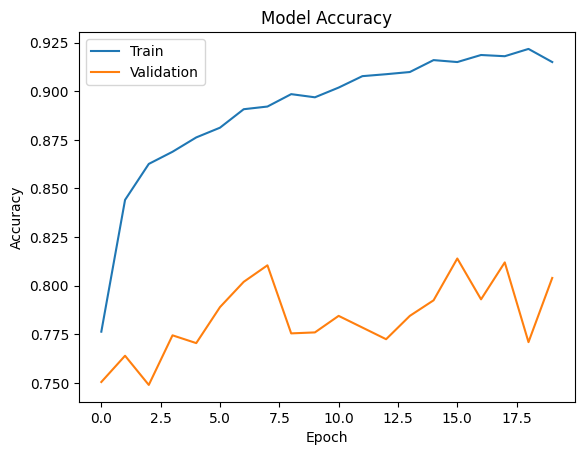

In [13]:
# Training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

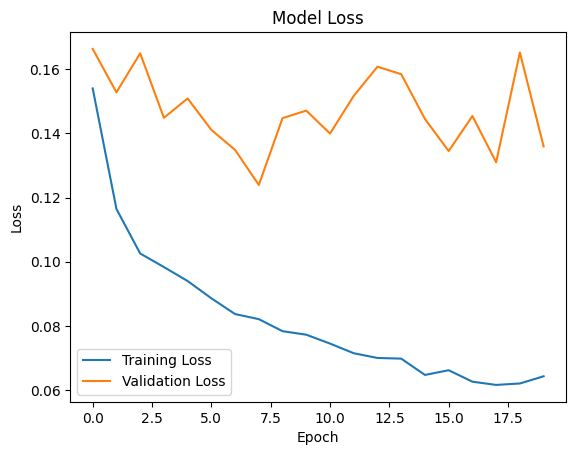

In [14]:
# Training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix
conf_matrix = confusion_matrix(B, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(B, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(B, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(B, y_pred, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_pred, y_pred, average='weighted')
print("F1 Score:", f1)


In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [10]:
#ANN model: Using binary_crossentropy
model = Sequential() 

model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],))) 
model.add(GaussianNoise(0.1))
model.add(Dropout(0.3)) 

model.add(BatchNormalization())

model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.3)) 

model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.3)) 

model.add(Dense(32, activation='relu')) 
model.add(Dropout(0.3)) 

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history= model.fit(X_train_scaled, Y, batch_size=64, epochs=20, validation_data=(X_val_scaled, B))

Epoch 1/20
125/125 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7628 - val_loss: 0.5092 - val_accuracy: 0.7245
Epoch 2/20
125/125 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8462 - val_loss: 0.4787 - val_accuracy: 0.7450
Epoch 3/20
125/125 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8575 - val_loss: 0.4093 - val_accuracy: 0.7910
Epoch 4/20
125/125 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8689 - val_loss: 0.4248 - val_accuracy: 0.7790
Epoch 5/20
125/125 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8784 - val_loss: 0.4777 - val_accuracy: 0.7545
Epoch 6/20
125/125 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.8846 - val_loss: 0.4495 - val_accuracy: 0.7725
Epoch 7/20
125/125 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.8852 - val_loss: 0.4247 - val_accuracy: 0.7820
Epoch 

## CNN MODEL

In [19]:
# CNN model

model_1 = Sequential()

model_1.add(Conv1D(16, 3, activation='relu', input_shape=(1613, 1)))
model_1.add(MaxPooling1D(2))
model_1.add(GaussianNoise(0.15))

model_1.add(BatchNormalization())
model_1.add(Dropout(0.2))


model_1.add(Conv1D(32, 3, activation='relu'))
model_1.add(MaxPooling1D(2))

model_1.add(Dropout(0.2))

model_1.add(Conv1D(64, 3, activation='relu'))
model_1.add(MaxPooling1D(2))
model_1.add(GaussianNoise(0.15))

model_1.add(BatchNormalization())
model_1.add(Dropout(0.2))

model_1.add(Flatten())

model_1.add(Dense(128, activation='relu'))

model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(512, activation='relu'))

model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history2=model_1.fit(X_train_scaled,Y,epochs=15,validation_data=(X_val_scaled,B))

Epoch 1/15
250/250 [==============================] - 5s 19ms/step - loss: 0.1589 - accuracy: 0.7870 - val_loss: 0.2448 - val_accuracy: 0.6740
Epoch 2/15
250/250 [==============================] - 5s 18ms/step - loss: 0.1151 - accuracy: 0.8451 - val_loss: 0.1857 - val_accuracy: 0.7340
Epoch 3/15
250/250 [==============================] - 4s 18ms/step - loss: 0.1003 - accuracy: 0.8608 - val_loss: 0.1473 - val_accuracy: 0.7805
Epoch 4/15
250/250 [==============================] - 4s 18ms/step - loss: 0.0904 - accuracy: 0.8760 - val_loss: 0.1993 - val_accuracy: 0.7195
Epoch 5/15
250/250 [==============================] - 4s 17ms/step - loss: 0.0826 - accuracy: 0.8880 - val_loss: 0.2039 - val_accuracy: 0.7370
Epoch 6/15
250/250 [==============================] - 4s 17ms/step - loss: 0.0744 - accuracy: 0.9016 - val_loss: 0.1609 - val_accuracy: 0.7665
Epoch 7/15
250/250 [==============================] - 4s 16ms/step - loss: 0.0695 - accuracy: 0.9089 - val_loss: 0.1506 - val_accuracy: 0.7860

In [20]:
model_1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_40 (Conv1D)          (None, 1611, 16)          64        
                                                                 
 max_pooling1d_41 (MaxPooli  (None, 805, 16)           0         
 ng1D)                                                           
                                                                 
 gaussian_noise_27 (Gaussia  (None, 805, 16)           0         
 nNoise)                                                         
                                                                 
 batch_normalization_26 (Ba  (None, 805, 16)           64        
 tchNormalization)                                               
                                                                 
 dropout_39 (Dropout)        (None, 805, 16)           0         
                                                     

In [21]:
predictions = model_1.predict(X_val_scaled)
y_pred = np.argmax(predictions, axis=1)

63/63 [==============================] - 0s 4ms/step


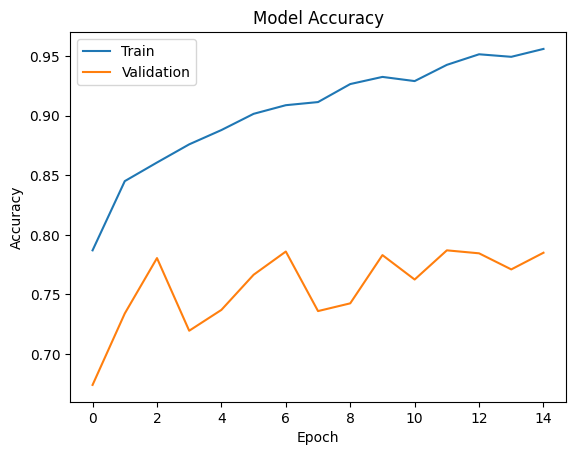

In [22]:
# Training & validation accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

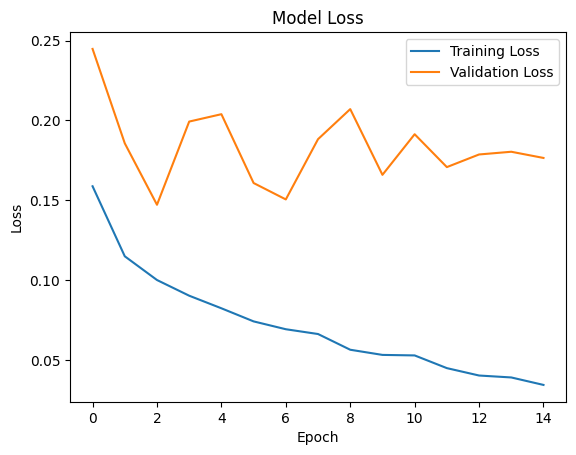

In [23]:
# Training & validation loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix
conf_matrix = confusion_matrix(B, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(B, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(B, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(B, y_pred, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_pred, y_pred, average='weighted')
print("F1 Score:", f1)

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [12]:
# CNN model- using binary_crossentropy

model_1 = Sequential()

model_1.add(Conv1D(16, 3, activation='relu', input_shape=(1613, 1)))
model_1.add(MaxPooling1D(2))
model_1.add(GaussianNoise(0.15))

model_1.add(BatchNormalization())
model_1.add(Dropout(0.2))


model_1.add(Conv1D(32, 3, activation='relu'))
model_1.add(MaxPooling1D(2))

model_1.add(Dropout(0.2))

model_1.add(Conv1D(64, 3, activation='relu'))
model_1.add(MaxPooling1D(2))
model_1.add(GaussianNoise(0.15))

model_1.add(BatchNormalization())
model_1.add(Dropout(0.2))

model_1.add(Flatten())

model_1.add(Dense(128, activation='relu'))

model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(512, activation='relu'))

model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history2=model_1.fit(X_train_scaled,Y,epochs=15,validation_data=(X_val_scaled,B))

Epoch 1/15
250/250 [==============================] - 4s 15ms/step - loss: 0.4603 - accuracy: 0.7889 - val_loss: 1.0318 - val_accuracy: 0.5390
Epoch 2/15
250/250 [==============================] - 4s 16ms/step - loss: 0.3687 - accuracy: 0.8406 - val_loss: 0.5974 - val_accuracy: 0.7410
Epoch 3/15
250/250 [==============================] - 4s 16ms/step - loss: 0.3238 - accuracy: 0.8625 - val_loss: 0.6053 - val_accuracy: 0.7345
Epoch 4/15
250/250 [==============================] - 4s 17ms/step - loss: 0.2924 - accuracy: 0.8739 - val_loss: 0.6873 - val_accuracy: 0.7335
Epoch 5/15
250/250 [==============================] - 4s 17ms/step - loss: 0.2619 - accuracy: 0.8904 - val_loss: 0.6128 - val_accuracy: 0.7400
Epoch 6/15
250/250 [==============================] - 4s 18ms/step - loss: 0.2466 - accuracy: 0.8984 - val_loss: 0.6430 - val_accuracy: 0.7435
Epoch 7/15
250/250 [==============================] - 4s 17ms/step - loss: 0.2194 - accuracy: 0.9107 - val_loss: 0.4977 - val_accuracy: 0.7635

# LSTM Model

In [15]:
# Reshaping
X = X.reshape(-1, 1613, 1)
A = A.reshape(-1, 1613, 1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X.reshape(-1, 1)).reshape(X.shape)
X_val_scaled = scaler.transform(A.reshape(-1, 1)).reshape(A.shape)


In [44]:
# LSTM Model

model_3 = Sequential([

    LSTM(units=512, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    GaussianNoise(0.15),

    Dense(256, activation='relu'),
    Dropout(0.2),

    Dense(128, activation='relu'),
    Dropout(0.2),
    GaussianNoise(0.15),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(32, activation='relu'),
    
    Dense(units=1)
])

model_3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history4=model_3.fit(X_train_scaled, Y, epochs=1, batch_size=32, validation_data=(X_val_scaled, B))


250/250 [==============================] - 627s 3s/step - loss: nan - accuracy: 0.5010 - val_loss: nan - val_accuracy: 0.5000


In [16]:
# LSTM Model- using binary crossentropy

model_3 = Sequential([

    LSTM(units=512, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    GaussianNoise(0.15),

    Dense(256, activation='relu'),
    Dropout(0.2),

    Dense(128, activation='relu'),
    Dropout(0.2),
    GaussianNoise(0.15),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(32, activation='relu'),
    
    Dense(units=1)
])

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history4=model_3.fit(X_train_scaled, Y, epochs=1, batch_size=32, validation_data=(X_val_scaled, B))


250/250 [==============================] - 662s 3s/step - loss: nan - accuracy: 0.5004 - val_loss: nan - val_accuracy: 0.5000


In [46]:
# LSTM Model-  basic

model_3 = Sequential([

    LSTM(units=32, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),

    Dense(64, activation='relu'),

    Dense(128, activation='relu'),

    Flatten(),

    Dense(256, activation='relu'),
    
    Dense(units=1)
])

model_3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history5=model_3.fit(X_train_scaled, Y, epochs=1, batch_size=32, validation_data=(X_val_scaled, B))


250/250 [==============================] - 24s 96ms/step - loss: 0.2812 - accuracy: 0.5011 - val_loss: 0.2562 - val_accuracy: 0.5095


# Transformer

In [50]:
# Transformer 

def transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = inputs

    # Encoder layers
    for _ in range(2):
        x = MultiHeadAttention(num_heads=4, key_dim=16)(x, x)
        x = LayerNormalization(epsilon=1e-6)(x)
        x = Dropout(0.1)(x)
    x = GlobalAveragePooling1D()(x)

    # Output layer
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    return model

model = transformer_model(input_shape=(1613, 1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
history6=model.fit(X_train_scaled, Y, epochs=1, batch_size=32, validation_data=(X_val_scaled, B))


250/250 [==============================] - 558s 2s/step - loss: 0.3268 - accuracy: 0.5000 - val_loss: 0.2542 - val_accuracy: 0.5000


In [54]:
# Define Transformer model
def transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = inputs
    # Encoder layers
    for _ in range(4):  # Increase the number of layers
        x = MultiHeadAttention(num_heads=8, key_dim=32)(x, x)  # Increase complexity
        x = LayerNormalization(epsilon=1e-6)(x)
        x = Dropout(0.2)(x)  # Increase dropout rate
    x = GlobalAveragePooling1D()(x)
    # Output layer
    outputs = Dense(1)(x)  # Output layer for regression
    model = Model(inputs, outputs)
    return model

# Create the Transformer model
model = transformer_model(input_shape=(1613, 1))

# Define optimizer and learning rate scheduler
optimizer = Adam(lr=0.001)  # You can adjust the learning rate
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)